In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dfx = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

Y = dfx['target'].values
dfx.drop(columns=['target'], inplace=True)

X = dfx.values
X_t = test.values
Y = Y.reshape(-1,1)

In [4]:
# Normalize the Training dataset

u = np.mean(X, axis=0)
std = np.std(X, axis=0)

X = (X-u)/std

In [5]:
# Normalize the Testing Dataset

u_t = np.mean(X_t, axis=0)
std_t = np.std(X_t, axis=0)

X_t = (X_t-u_t)/std_t


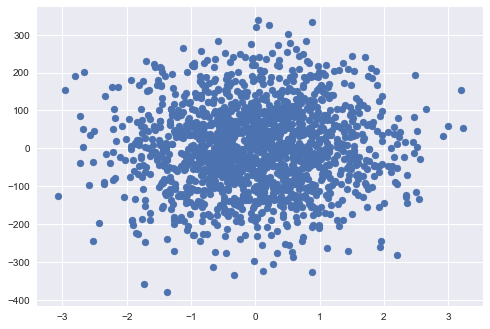

In [6]:
# Visualise

plt.style.use('seaborn')
plt.scatter(X[:,2], Y)
plt.show()

In [7]:
# Stack the training array with x0=1 

x0 = np.ones((X.shape[0],1))
X_train = np.hstack((x0, X))

In [8]:
# Stack the test array with x0=1 

x0_t = np.ones((X_t.shape[0],1))
X_test = np.hstack((x0_t, X_t))

In [9]:
# Convert training data into matrices

X_train = np.mat(X_train)
X_test = np.mat(X_test)
Y = np.mat(Y)

In [10]:
def getW(query_point, X, tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
        
    return W

In [11]:
def predict(X, Y, query_point, tau):
    
    X_ = X
    W = getW(query_point, X_, tau)
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(query_point,theta)
    return theta,pred

In [12]:
def plotPredictions(tau):
    Y_test = []
    
    for point in X_test:
        theta, pred = predict(X_train, Y, point, tau)
        Y_test.append(pred)
        
    Y_test = np.array(Y_test)
    return Y_test

In [13]:
predictions = plotPredictions(1.0)
predictions.shape

(400, 1, 1)

In [14]:
final = np.array(predictions)

In [15]:
final = final.reshape(-1,1)
df = pd.DataFrame(final, columns=['target'])

In [16]:
df.to_csv('output.csv')